In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

In [2]:
def read_tps(filename):
    with open(filename, 'r') as fp:
        contents = fp.read()
        
    print(contents)
    tps_match = re.search('tps = (\d+(?:\.\d+)) \(including connections establishing\)', contents)
    print(tps_match.groups)
    return float(tps_match.group(1))
    
read_tps('results/9.3-4-prepared.results')

transaction type: TPC-B (sort of)
scaling factor: 1
query mode: prepared
number of clients: 1
number of threads: 1
number of transactions per client: 4
number of transactions actually processed: 4/4
tps = 295.573783 (including connections establishing)
tps = 447.828034 (excluding connections establishing)

<built-in method groups of _sre.SRE_Match object at 0x7efd3f83f378>


295.573783

transaction type: TPC-B (sort of)
scaling factor: 1
query mode: extended
number of clients: 1
number of threads: 1
number of transactions per client: 4
number of transactions actually processed: 4/4
tps = 352.453961 (including connections establishing)
tps = 456.412597 (excluding connections establishing)

<built-in method groups of _sre.SRE_Match object at 0x7efd3f83f378>
transaction type: <builtin: TPC-B (sort of)>
scaling factor: 1
query mode: prepared
number of clients: 1
number of threads: 1
number of transactions per client: 2
number of transactions actually processed: 2/2
latency average = 4.236 ms
tps = 236.071766 (including connections establishing)
tps = 353.107345 (excluding connections establishing)

<built-in method groups of _sre.SRE_Match object at 0x7efd3f83f378>
transaction type: <builtin: TPC-B (sort of)>
scaling factor: 1
query mode: simple
number of clients: 1
number of threads: 1
number of transactions per client: 1
number of transactions actually processed: 1/1
la

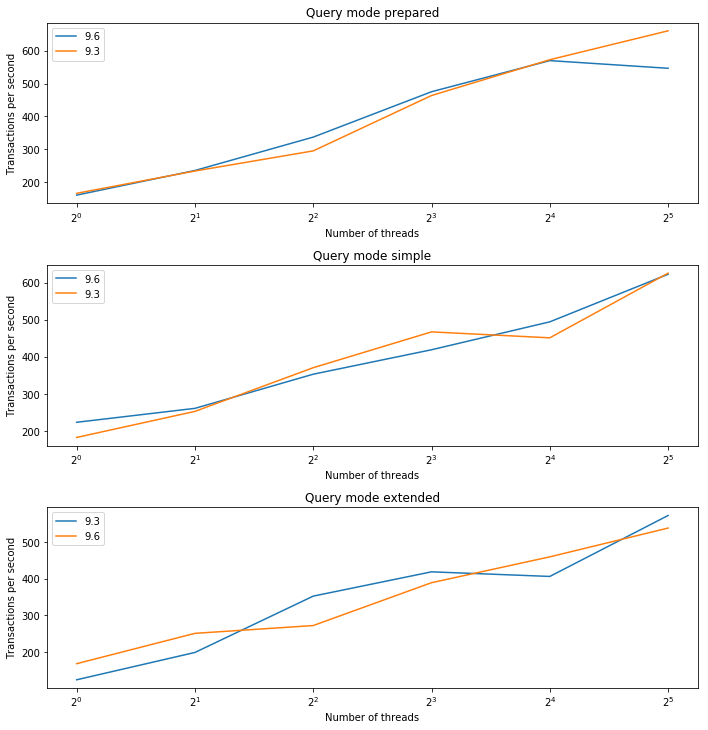

In [ ]:
from glob import glob
from collections import defaultdict

param_regex = re.compile('results/(.*)-(\d+)-(simple|extended|prepared).results')
def get_params(path):
    return param_regex.match(path).groups()

data_points = defaultdict(list)
plots = set([])

for filename in glob('workflows/pgbench/results/*.results'):
    version, threads, query_mode = get_params(filename)
    tps = read_tps(filename)
    plots.add(query_mode)
    data_points[(version, query_mode)].append((int(threads), tps))
    
for value in data_points.values():
    value.sort()

t = np.arange(0.01, 20.0, 0.01)

plt.figure(figsize=(10, 10))

for i, query_mode in enumerate(plots):
    plt.subplot(3,1,i+1)
    plt.tight_layout()
    
    plt.title("Query mode {}".format(query_mode))
    for version, points in [(key[0], points) for key, points in data_points.items()
                            if key[1] == query_mode]:
        plt.xscale('log', basex=2)
        plt.plot(*zip(*points), label=version)

    plt.legend(loc='upper left')
    plt.xlabel('Number of threads')
    plt.ylabel('Transactions per second')

plt.savefig('figures/pgbench-comparison.pdf', bbox_inches='tight')
plt.show()